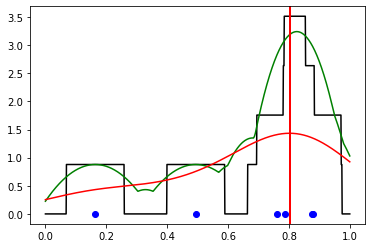

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# uniform kernel
def Ku(u):
	return (np.abs(u)<0.5).astype(np.float)

# gaussian kernel
def Ks(u):
	return np.exp(-0.5*np.square(u)) / np.sqrt(2*np.pi)

# epanechnikov kernel
def Ke(u):
	return (np.square(u)<=1).astype(np.float) * (1-np.square(u))             

# A mean-shift implementation
# x - data points
# k - the mean shift cluster initial points
# Kdx - partial derivative function to be used when taking a step
# h - filter bandwidth
# epsilon_error - loops until the squared shift is less than epsilon_error
def mean_shift(x, k, Kdx, h, epsilon_error):
	m=k.shape[0]			# number of points to perform the ascent with
	error=epsilon_error+1
	while (error >= epsilon_error):
		error=0
		# preform a gradient ascent
		for ki in range(0, m):
			dk=Kdx((k[ki]-x) / h)
			numerator=np.sum(dk * x)
			denominator=np.sum(dk)
			shift=(np.sum(np.divide(numerator,denominator)) - k[ki])
			k[ki]+=shift
			error += np.sum(np.abs(shift))
	return k

# entrypoint
def main(unused_argv):
	# generate input data 
	m=6 		# number of inputs
	x=np.random.uniform(low=0.0, high=1.0, size=(m))	# generate inputs

	# bandwidth
	h=np.std(x)*np.power((4/3/m),(1/5)); # Silverman's rule of thumb

	# compute the mean shift
	epsilon_error=0.000001 	# iteration stopping threshold
	k=x.copy() 				# make each local maximum candidate to start at data points
	mean_shifted_points_s = mean_shift(x, k, Ks, h, epsilon_error)
	

	# ----------------------------------
	# plot the density functions and the discovered local maximas
	
	# create points for plotting of density functions purposes
	i=np.arange(0,1,0.001).reshape(-1,1)		# denerate the datapoints for sampling the density functions
	kernels_uniform=(1/(m*h)) * np.sum( Ku( (i-x) / h), axis=1)
	kernels_gaussian=(1/(m*h)) * np.sum( Ks( (i-x) / h), axis=1)
	kernels_epanechnikov=(1/(m*h)) * np.sum( Ke( (i-x) / h), axis=1)
	# plot the data points
	plt.plot(x, np.zeros_like(x), "ro", color='blue')
	# plot the functions
	plt.plot(i, kernels_uniform, "b-", color='black')
	plt.plot(i, kernels_epanechnikov, "g-", color='green')
	plt.plot(i, kernels_gaussian, "r-", color='red')
	# plot the local maxima for the standard gaussian density function
	for ms in mean_shifted_points_s:
		plt.axvline(x=ms, color='red')
	
	plt.show()

	return 0

# main
if __name__ == "__main__":
	main(main)

## Ok, now let's test it with our dataset.

In [2]:
import os
import sys
import time
import pandas as pd

sys.path.append('../')

from tsgen import TsGenerator
from nc_explorer import NcExplorer

tsgen = TsGenerator()
exp = NcExplorer()

Declaring class instance from: S3-FRBR:Nc_Explorer
Input NetCDF file folde not set. Proceed at your own risk.


Generating image


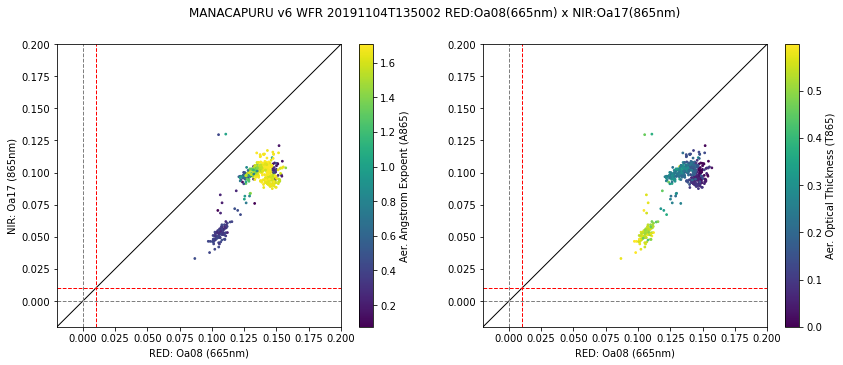

In [3]:
workdir = 'D:\processing\win\MANACAPURUv6ndLOWRW'
img = 'S3A_OL_2_WFR____20191104T135002_20191104T135302_20191124T134508_0179_051_124_3060_MAR_O_NT_002_subset.txt'
fullpath = os.path.join(workdir,img)
df = pd.read_csv(fullpath)

figdate = os.path.basename(fullpath).split('____')[1].split('_')[0]
figtitl = 'MANACAPURU v6 nd LOWRW '+figdate

print(f'Generating image')

tsgen.plot_sidebyside_sktr(x1_data=df['Oa08_reflectance:float'],
                           y1_data=df['Oa17_reflectance:float'],
                           x2_data=df['Oa08_reflectance:float'],
                           y2_data=df['Oa17_reflectance:float'],
                           x_lbl='RED: Oa08 (665nm)',
                           y_lbl='NIR: Oa17 (865nm)',
                           c1_data=df['A865:float'],
                           c1_lbl='Aer. Angstrom Expoent (A865)',
                           c2_data=df['T865:float'],
                           c2_lbl='Aer. Optical Thickness (T865)',
                           title=f'MANACAPURU v6 WFR {figdate} RED:Oa08(665nm) x NIR:Oa17(865nm)')

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  2.,  0.,  0.,  1.,  7.,  3.,  5.,  3.,  3.,  6.,
         9., 12., 11., 14.,  7.,  2.,  6.,  2.,  6.,  3.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  3.,  3.,  1.,
         1.,  5.,  3.,  6.,  9.,  3.,  9.,  7.,  5.,  8.,  8.,  6., 13.,
        11., 15., 18., 15., 15.,  7., 14., 10., 21., 12.,  7., 13., 14.,
        16., 24., 13., 14., 13., 10.,  8., 13., 16., 11.,  7., 10.,  0.,
         5.,  6.,  3.,  2.,  2.,  2.,  1.,  0.,  1.]),
 array([0.08677023, 0.08747448, 0.08817872, 0.08888297, 0.08958721,
        0.09029146, 0.0909957 , 0.09169995, 0.09240419, 0.09310844,
        0.09381268, 0.09451693, 0.09522117, 0.09592542, 0.09662966,
        0.09733391, 0.09803815, 0.0987424 , 0.09944664, 0.10015089,
        0.10085513, 0.10155938, 0.10226362, 0.10296787, 0.10367211,
        0.10437636, 0.10508061, 0.10578485, 0.1064891 , 0.10719334,
        0.10789759, 0.1086

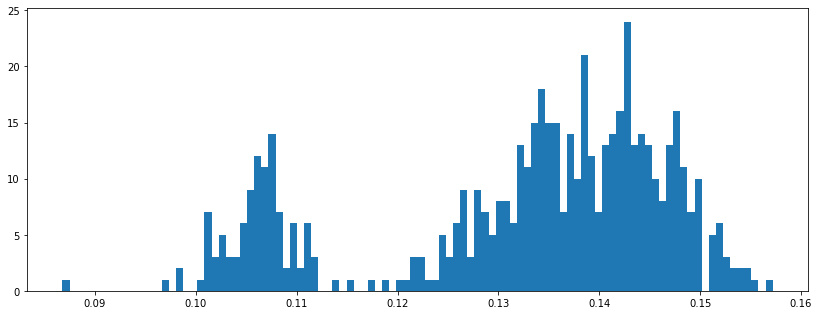

In [4]:
plt.hist(df['Oa08_reflectance:float'],100)

## Here it goes!

In [5]:
x = df['Oa08_reflectance:float'].copy()

print(x.min(),x.max(),len(x))

0.08677023 0.15719475 549


In [6]:
t1 = time.perf_counter()

x = df['Oa08_reflectance:float'].copy()

m = len(x)

# bandwidth
h=np.std(x)*np.power((4/3/m),(1/5)); # Silverman's rule of thumb

# compute the mean shift
epsilon_error=0.001 	# iteration stopping threshold

k=x.copy() 				# make each local maximum candidate to start at data points

mean_shifted_points_s = mean_shift(x, k, Ks, h, epsilon_error)

t2 = time.perf_counter()
print(f'>>> Finished in {round(t2 - t1, 2)} second(s). <<<')

>>> Finished in 18.71 second(s). <<<


In [7]:
m2 = np.round(mean_shifted_points_s,4)

In [8]:
np.unique(m2)

array([0.1065, 0.1402, 0.1403])

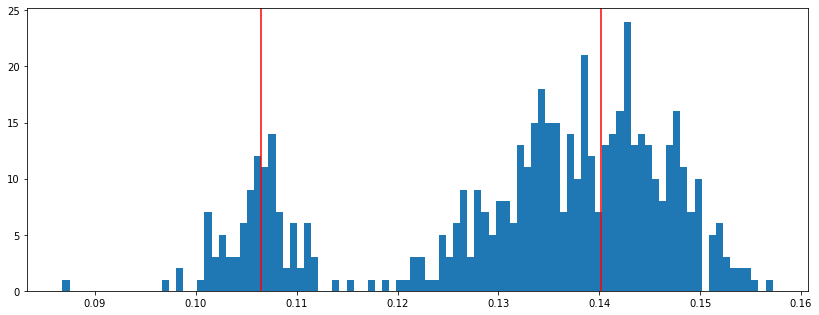

In [9]:
plt.hist(df['Oa08_reflectance:float'],100)
plt.axvline(np.unique(m2)[0], color='red')
plt.axvline(np.unique(m2)[1], color='red')

## It works but it also takes too long. Now let's try using scipy's implementation

In [230]:
from scipy import stats
import time

workdir = 'D:\processing\win\MANACAPURUv6ndLOWRW'
img = 'S3A_OL_2_WFR____20191104T135002_20191104T135302_20191124T134508_0179_051_124_3060_MAR_O_NT_002_subset.txt'
fullpath = os.path.join(workdir,img)
df = pd.read_csv(fullpath)

x = df['Oa08_reflectance:float'].copy()

t1 = time.perf_counter()
kernel = stats.gaussian_kde(dataset=x,bw_method='silverman')
t2 = time.perf_counter()
print(f'>>> Finished in {round(t2 - t1, 2)} second(s). <<<')

>>> Finished in 0.0 second(s). <<<


In [44]:
kde_res = kernel(x)
m3 = np.round(kde_res,2)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  2.,  0.,  0.,  1.,  7.,  3.,  5.,  3.,  3.,  6.,
         9., 12., 11., 14.,  7.,  2.,  6.,  2.,  6.,  3.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  3.,  3.,  1.,
         1.,  5.,  3.,  6.,  9.,  3.,  9.,  7.,  5.,  8.,  8.,  6., 13.,
        11., 15., 18., 15., 15.,  7., 14., 10., 21., 12.,  7., 13., 14.,
        16., 24., 13., 14., 13., 10.,  8., 13., 16., 11.,  7., 10.,  0.,
         5.,  6.,  3.,  2.,  2.,  2.,  1.,  0.,  1.]),
 array([0.08677023, 0.08747448, 0.08817872, 0.08888297, 0.08958721,
        0.09029146, 0.0909957 , 0.09169995, 0.09240419, 0.09310844,
        0.09381268, 0.09451693, 0.09522117, 0.09592542, 0.09662966,
        0.09733391, 0.09803815, 0.0987424 , 0.09944664, 0.10015089,
        0.10085513, 0.10155938, 0.10226362, 0.10296787, 0.10367211,
        0.10437636, 0.10508061, 0.10578485, 0.1064891 , 0.10719334,
        0.10789759, 0.1086

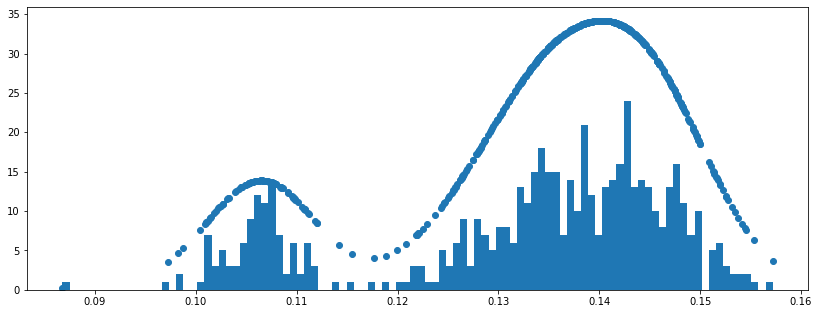

In [55]:
plt.scatter(x,kde_res)
plt.hist(x,100)

In [143]:
# a = np.array(x).reshape(-1,1)

# from sklearn.neighbors.kde import KernelDensity

# kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(a)

# print(kde)

s = np.linspace(0,len(kde_res),len(kde_res))

In [193]:
len(x),len(kde_res)

(549, 549)

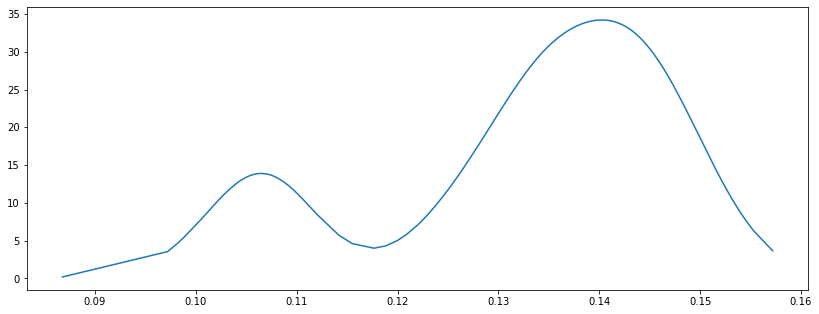

In [194]:
# https://stackoverflow.com/questions/37414916/pythons-matplotlib-plotting-in-wrong-order
xs, ys = zip(*sorted(zip(x, kde_res)))

plt.plot(xs, ys)

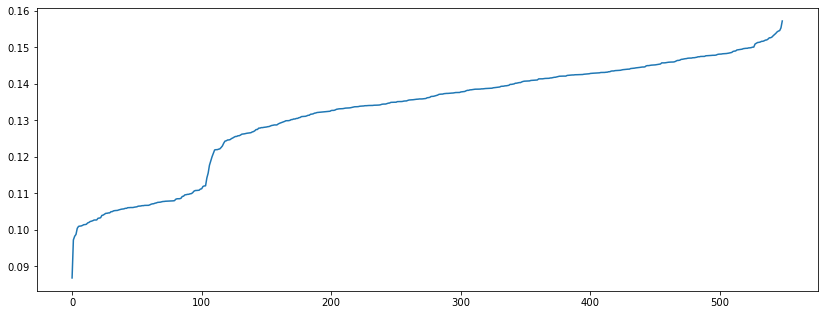

In [201]:
plt.plot(xs)

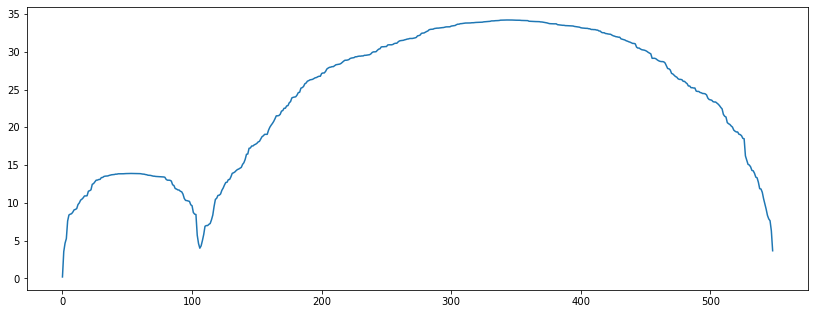

In [235]:
plt.plot(ys)

In [214]:
xray = np.array(xs)
yray = np.array(ys)

from scipy.signal import argrelextrema
mi, ma = argrelextrema(yray, np.less)[0], argrelextrema(yray, np.greater)[0]
print("Minima:", xray[mi])
print("Maxima:", xray[ma])

Minima: [0.11766107]
Maxima: [0.10649129 0.14022034]


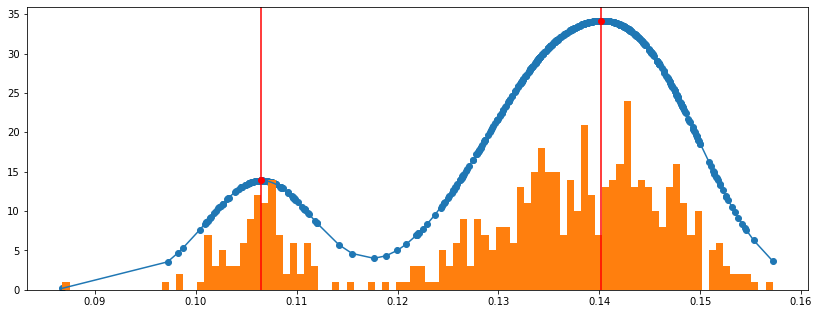

In [234]:
plt.plot(xray,yray)
plt.plot(xray[ma],yray[ma],'or')
plt.scatter(x,kde_res)
plt.hist(x,100)
plt.axvline(xray[ma][0], color='red')
plt.axvline(xray[ma][1], color='red')

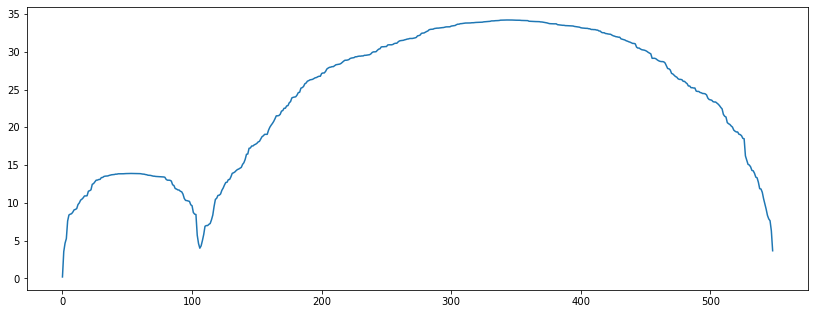

In [111]:
order = x.argsort()

sort_kde_res = kde_res[order]

plt.plot(sort_kde_res)

In [19]:
from scipy.signal import find_peaks, peak_prominences
from scipy.signal import argrelmax

In [20]:
print(argrelmax(sort_kde_res))

(array([ 53, 344], dtype=int64),)


In [ ]:
peaks, _ = find_peaks(sort_kde_res)

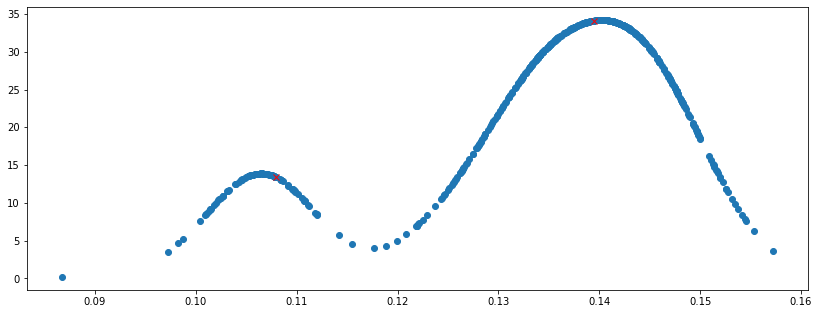

In [24]:
plt.scatter(df['Oa08_reflectance:float'],kde_res)
plt.plot(x[53],kde_res[53],'xr')
plt.plot(x[344],kde_res[344],'xr')

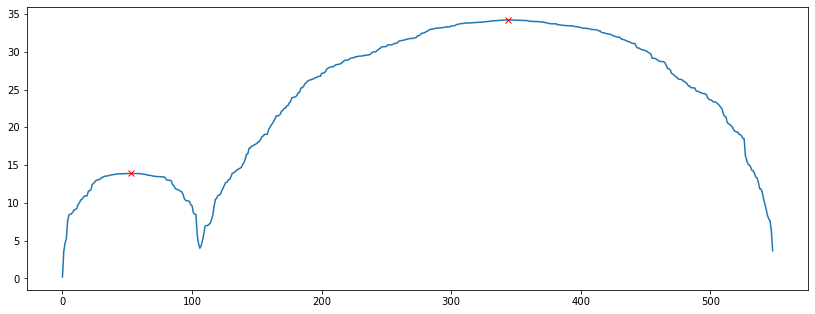

In [27]:
plt.plot(sort_kde_res)
plt.plot(53,sort_kde_res[53],'xr')
plt.plot(344,sort_kde_res[344],'xr')